# Esercizi 12 - Image recognition

### Initialization

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from tensorflow.keras.layers import LeakyReLU




# Ho avuto dei problemi a far funzionare tensorflow utilizzando più layer su jupyter,
# https://stackoverflow.com/questions/53014306/error-15-initializing-libiomp5-dylib-but-found-libiomp5-dylib-already-initial
# Ho utilizzato la soluzione trovata in quel link, non ho la più pallida idea di cosa sia ma funziona
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)


# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

## 12.1 - DNN

In [2]:
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    return model

def compile_model(optimizer):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

In [3]:
# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN_sgd = compile_model(SGD())

# train DNN and store training info in history
history_sgd = model_DNN_sgd.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 192us/sample - loss: 0.7272 - accuracy: 0.7879 - val_loss: 0.2992 - val_accuracy: 0.9180
Epoch 2/5
60000/60000 [==============================] - 11s 184us/sample - loss: 0.3715 - accuracy: 0.8941 - val_loss: 0.2331 - val_accuracy: 0.9333
Epoch 3/5
60000/60000 [==============================] - 9s 151us/sample - loss: 0.3013 - accuracy: 0.9153 - val_loss: 0.1966 - val_accuracy: 0.9443
Epoch 4/5
60000/60000 [==============================] - 9s 149us/sample - loss: 0.2625 - accuracy: 0.9258 - val_loss: 0.1733 - val_accuracy: 0.9478
Epoch 5/5
60000/60000 [==============================] - 9s 151us/sample - loss: 0.2296 - accuracy: 0.9349 - val_loss: 0.1555 - val_accuracy: 0.9516


In [4]:
# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN_adam = compile_model(Adam())

# train DNN and store training info in history
history_adam = model_DNN_adam.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 20s 335us/sample - loss: 0.2874 - accuracy: 0.9161 - val_loss: 0.1042 - val_accuracy: 0.9683
Epoch 2/5
60000/60000 [==============================] - 18s 305us/sample - loss: 0.1201 - accuracy: 0.9657 - val_loss: 0.0875 - val_accuracy: 0.9724
Epoch 3/5
60000/60000 [==============================] - 18s 294us/sample - loss: 0.0867 - accuracy: 0.9747 - val_loss: 0.0784 - val_accuracy: 0.9761
Epoch 4/5
60000/60000 [==============================] - 17s 289us/sample - loss: 0.0671 - accuracy: 0.9800 - val_loss: 0.0791 - val_accuracy: 0.9772
Epoch 5/5
60000/60000 [==============================] - 19s 318us/sample - loss: 0.0577 - accuracy: 0.9824 - val_loss: 0.0701 - val_accuracy: 0.9798


In [5]:
# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN_adadelta = compile_model(Adadelta())

# train DNN and store training info in history
history_adadelta = model_DNN_adadelta.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 29s 491us/sample - loss: 2.2258 - accuracy: 0.1836 - val_loss: 2.0952 - val_accuracy: 0.3996
Epoch 2/5
60000/60000 [==============================] - 29s 479us/sample - loss: 2.0604 - accuracy: 0.3101 - val_loss: 1.9316 - val_accuracy: 0.5893
Epoch 3/5
60000/60000 [==============================] - 30s 494us/sample - loss: 1.9091 - accuracy: 0.4239 - val_loss: 1.7675 - val_accuracy: 0.6839
Epoch 4/5
60000/60000 [==============================] - 28s 468us/sample - loss: 1.7623 - accuracy: 0.5052 - val_loss: 1.6061 - val_accuracy: 0.7389
Epoch 5/5
60000/60000 [==============================] - 32s 541us/sample - loss: 1.6221 - accuracy: 0.5630 - val_loss: 1.4526 - val_accuracy: 0.7727


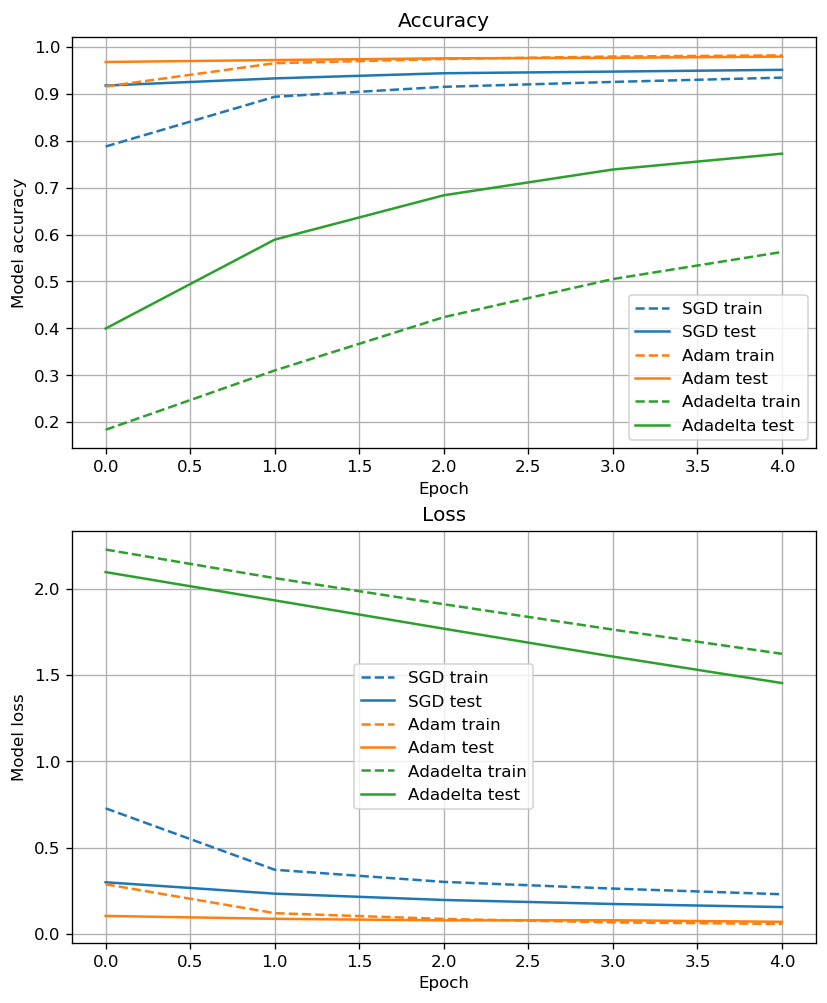


Test loss SGD: 0.15549473473057152
Test accuracy SGD: 0.9516

Test loss Adam: 0.07007051936378848
Test accuracy Adam: 0.9798

Test loss Adadelta: 1.452648881149292
Test accuracy Adadelta: 0.7727


In [6]:
# evaluate model
score_sgd = model_DNN_sgd.evaluate(X_test, Y_test, verbose=0)
score_adam = model_DNN_adam.evaluate(X_test, Y_test, verbose=0)
score_adadelta = model_DNN_adadelta.evaluate(X_test, Y_test, verbose=0)


# summarize history for accuracy
fig, (ax1,ax2)=plt.subplots(2,1, figsize=(8,10), dpi=120)

ax1.plot(history_sgd.history['accuracy'], color="C0", linestyle="dashed", label="SGD train")
ax1.plot(history_sgd.history['val_accuracy'], color="C0", label="SGD test")
ax1.plot(history_adam.history['accuracy'],color="C1", linestyle="dashed", label="Adam train")
ax1.plot(history_adam.history['val_accuracy'], color="C1", label="Adam test")
ax1.plot(history_adadelta.history['accuracy'], color="C2", linestyle="dashed", label="Adadelta train")
ax1.plot(history_adadelta.history['val_accuracy'], color="C2", label="Adadelta test")
ax1.set_title("Accuracy")
ax1.set_ylabel('Model accuracy')
ax1.set_xlabel('Epoch')
ax1.legend()
ax1.grid(True)


# summarize history for loss
ax2.plot(history_sgd.history['loss'], color="C0", linestyle="dashed", label="SGD train")
ax2.plot(history_sgd.history['val_loss'], color="C0", label="SGD test")
ax2.plot(history_adam.history['loss'],color="C1", linestyle="dashed", label="Adam train")
ax2.plot(history_adam.history['val_loss'], color="C1", label="Adam test")
ax2.plot(history_adadelta.history['loss'], color="C2", linestyle="dashed", label="Adadelta train")
ax2.plot(history_adadelta.history['val_loss'], color="C2", label="Adadelta test")
ax2.set_title("Loss")
ax2.set_ylabel('Model loss')
ax2.set_xlabel('Epoch')
ax2.legend()
ax2.grid(True)
plt.show()

# print performance
print()
print('Test loss SGD:', score_sgd[0])
print('Test accuracy SGD:', score_sgd[1])
print()
print('Test loss Adam:', score_adam[0])
print('Test accuracy Adam:', score_adam[1])
print()
print('Test loss Adadelta:', score_adadelta[0])
print('Test accuracy Adadelta:', score_adadelta[1])

Ho provato a confrontare gli ottimizzatori SGD, Adam e Adadelta. Il peggiore risulta essere Adadelta, mentre il migliore risulta essere Adam (che aveva dato risultati migliori anche nella scorsa esercitazione), essendo riuscito a classificare correttametne circa il $98 \%$ dei dati di test.

===== SGD ======


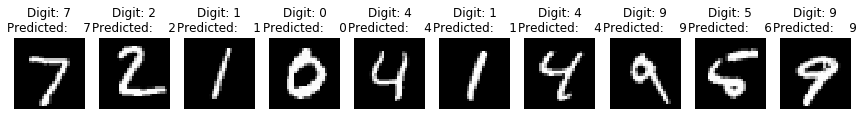

===== Adam ======


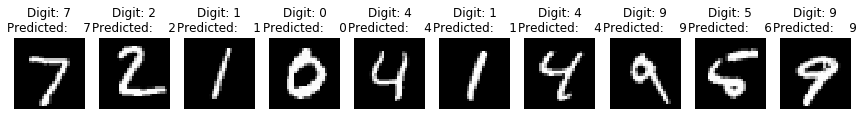

===== Adadelta ======


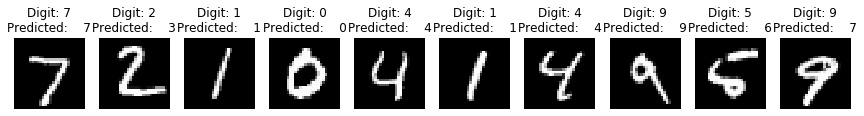

In [7]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

predictions_sgd = model_DNN_sgd.predict(X_test)
predictions_adam = model_DNN_adam.predict(X_test)
predictions_adadelta = model_DNN_adadelta.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
print("===== SGD ======")
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions_sgd[i])))    
    plt.axis('off') 
plt.show()
plt.figure(figsize=(15, 15)) 
print("===== Adam ======")
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions_adam[i])))    
    plt.axis('off') 
plt.show()
plt.figure(figsize=(15, 15)) 
print("===== Adadelta ======")
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions_adadelta[i])))    
    plt.axis('off') 
plt.show()

Controllando le predizioni su un campione di dieci cifre di test si può vedere che effettivamente il modello ottimizzato con Adam (seconda riga, accuracy $98\%$) è riuscito a indovinare tutte le cifre tranne una, così come il modello ottimizzato con SGD (prima riga, accuracy $95\%$). Infine, il modello ottimizzato con Adadelta sbaglia 3 cifre su 10 (terza riga, accuracy $77\%$). 

## 12.2, 12.3 - CNN

La rete è composta nel seguente modo:
1. Layer convoluzionale, 6 filtri 5x5 (ReLU activation)
2. Max pooling, 2x2
3. Layer convoluzione, 16 filtri 5x5 (ReLU activation)
4. Max pooling, 2x2
5. Flatten()
6. Un layer con 256 neuroni (ReLU activation)
7. Droupout (rate 0.25)
8. Layer di output (softmax activation)

Come ottimizzatore ho scelto Adam.

In [8]:
# you will need the following for Convolutional Neural Networks
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

def create_CNN(optimizer):
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.25))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

In [9]:
#training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN_adam=create_CNN(Adam())

# train CNN
history_CNN_adam = model_CNN_adam.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))



Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 43s 720us/sample - loss: 0.1759 - accuracy: 0.9471 - val_loss: 0.0581 - val_accuracy: 0.9811
Epoch 2/5
60000/60000 [==============================] - 43s 719us/sample - loss: 0.0618 - accuracy: 0.9807 - val_loss: 0.0381 - val_accuracy: 0.9873
Epoch 3/5
60000/60000 [==============================] - 46s 759us/sample - loss: 0.0464 - accuracy: 0.9857 - val_loss: 0.0379 - val_accuracy: 0.9863
Epoch 4/5
60000/60000 [==============================] - 42s 705us/sample - loss: 0.0361 - accuracy: 0.9882 - val_loss: 0.0278 - val_accuracy: 0.9914
Epoch 5/5
60000/60000 [==============================] - 41s 686us/sample - loss: 0.0306 - accuracy: 0.9903 - val_loss: 0.0306 - val_accuracy: 0.9912


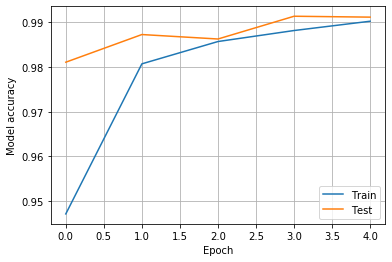

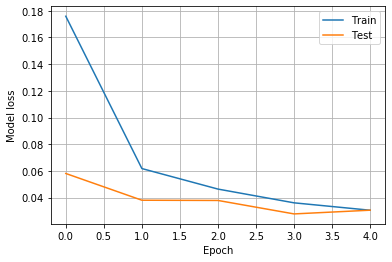


Test loss: 0.030580595257422828
Test accuracy: 0.9912


In [10]:
# evaluate model
score_CNN_adam = model_CNN_adam.evaluate(X_test, Y_test, verbose=0)

# look into training history

# summarize history for accuracy
plt.plot(history_CNN_adam.history['accuracy'])
plt.plot(history_CNN_adam.history['val_accuracy'])
plt.ylabel('Model accuracy')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend(['Train', 'Test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history_CNN_adam.history['loss'])
plt.plot(history_CNN_adam.history['val_loss'])
plt.ylabel('Model loss')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend(['Train', 'Test'], loc='best')
plt.show()


# print performance
print()
print('Test loss:', score_CNN_adam[0])
print('Test accuracy:', score_CNN_adam[1])


Viene raggiunta un'accuratezza di circa il $99\%$.

Ho quindi fatto un test con le cifre disegnate da me. Un set di cifre ho cercato di scriverle bene, mentre un secondo set l'ho scritto appositamente disordinao.


===== DNN - FIGURES (WELL-WRITTEN) ======


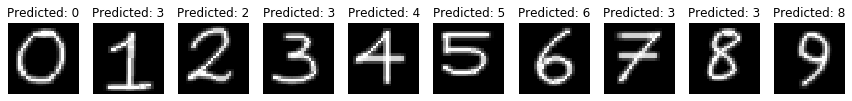

===== DNN - FIGURES (MESSY) ======


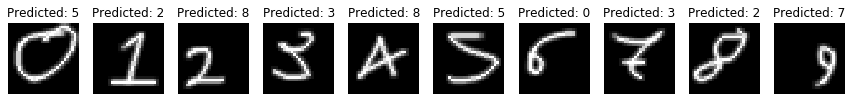


===== CNN - FIGURES (WELL-WRITTEN) ======


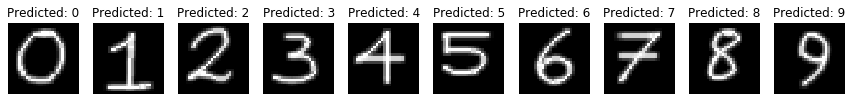

===== CNN - FIGURES (MESSY) ======


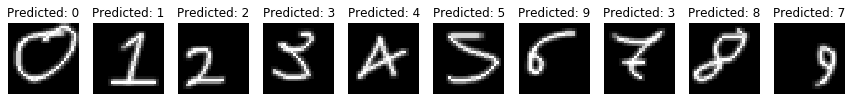

In [11]:
from PIL import Image
import os


figures=[]
figuresb=[]
figuresdnn=[]
figuresbdnn=[]

for i in range(10):
    digit_filename = "./Figures/"+str(i)+".png"
    digit_in = Image.open(digit_filename).convert('L')
    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]
    data /= 255

    figures.append(data)
    figuresdnn.append(data.reshape(1,xdim*ydim))


for i in range(10):
    digit_filename = "./Figures/"+str(i)+"b.png"
    digit_in = Image.open(digit_filename).convert('L')
    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]
    data /= 255
    figuresb.append(data)
    figuresbdnn.append(data.reshape(1,xdim*ydim))
   

plt.figure(figsize=(15, 15)) 
print()
print("===== DNN - FIGURES (WELL-WRITTEN) ======")
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(figures[i], cmap='gray')    
    plt.title("Predicted: " +str( np.argmax(model_DNN_adam.predict(figuresdnn[i]))))
    plt.axis('off') 
plt.show()
    
plt.figure(figsize=(15, 15)) 
print("===== DNN - FIGURES (MESSY) ======")
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(figuresb[i], cmap='gray') 
    plt.title("Predicted: " +str( np.argmax(model_DNN_adam.predict(figuresbdnn[i]))))
    plt.axis('off') 
plt.show()

plt.figure(figsize=(15, 15)) 
print()
print("===== CNN - FIGURES (WELL-WRITTEN) ======")
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(figures[i], cmap='gray')    
    plt.title("Predicted: " +str( np.argmax(model_CNN_adam.predict(figures[i].reshape(-1, img_rows, img_cols, 1)))))
    plt.axis('off') 
plt.show()
    
plt.figure(figsize=(15, 15)) 
print("===== CNN - FIGURES (MESSY) ======")
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(figuresb[i], cmap='gray') 
    plt.title("Predicted: " +str( np.argmax(model_CNN_adam.predict(figuresb[i].reshape(-1, img_rows, img_cols, 1)))))
    plt.axis('off') 
plt.show()

La DNN ottimizzata con Adam ha avuto un po' di difficolta con le cifre scritte bene (6/10), mentre ha indovinato solo 2/10 cifre di quelle scritte male. 

La CNN è significativamente migliore: è riuscita a individuare tutte le cifre scritte bene, mentre ha indovinato 7/10 cifre scritte male. Si può notare, in particolare, che è riuscita ad indovinare un 2 piccolo nell'angolo in basso a sinistra e un 3 e un 4 molto storti, segno che in una certa misura la rete ha acquisito una tolleranza alle traslazioni ed ha imparato a riconoscere delle caratteristiche locali delle immagini.


Dato che l'accuratezza del modello sul set di validazione è del $99\%$ mentre con le mie cifre scritte male è solo del $70\%$, è possibile che l'origine degli errori sia nel set di training: lo stile delle cifre potrebbe essere diverso (almeno in prevalenza). Ad esempio, è ragionevole che, se le stragrande maggioranza dei "7" nel dataset non ha la stanghetta centrale, la rete neurale faccia più fatica a riconoscerne uno che ha la stanghetta. Inoltre, il dataset potrebbe non contenere un numero elevato di cifre scritte male come le ho scritte io (nel senso letterale, ovvero che non hanno le stesse caratteristiche che rendono le mie cifre "strane", ad esempio il fatto che le stanghette del sette siano curve, oltre alla presenza della stanghetta centrale).

In [12]:
layer_index=0
for layer in model_CNN_adam.layers:
    print(layer_index, layer.name)
    layer_index+=1

0 conv2d
1 max_pooling2d
2 conv2d_1
3 max_pooling2d_1
4 flatten
5 dense_9
6 dropout_3
7 dense_10



INPUT DATA


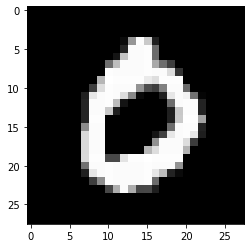


FIRST CONVOLUTIONAL LAYER
Filters shape  (5, 5, 1, 6)


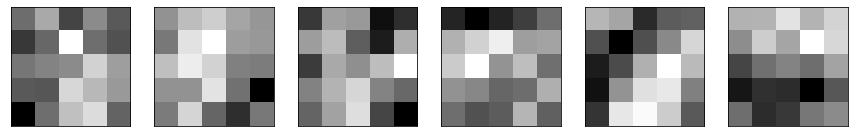


OUTPUT AFTER CONVOLUTIONAL LAYER


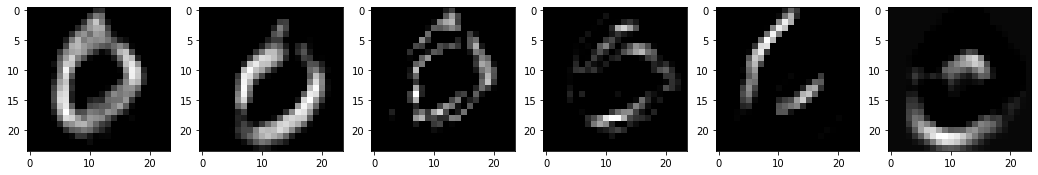

In [13]:
test_index = 3

from tensorflow.keras.models import Model
layer_outputs = [layer.output for layer in model_CNN_adam.layers]
activation_model = Model(inputs=model_CNN_adam.input, outputs=layer_outputs)
activations = activation_model.predict(X_test[test_index].reshape(1,28,28,1))
 
def display_activation(activations, nfilters, layer_index): 
    activation = activations[layer_index]
    activation_index=0
    fig, ax = plt.subplots(1, nfilters, figsize=(nfilters*3,nfilters*3))
    for i in range(nfilters):
        ax[i].imshow(activation[0, :, :, activation_index], cmap='gray')
        activation_index += 1

print()
print("INPUT DATA")
plt.imshow(X_test[test_index][:,:,0], cmap='gray')
plt.show()

# layer_index should be the index of a convolutional layer
layer_index=0
# retrieve weights from the convolutional hidden layer
filters, biases = model_CNN_adam.layers[layer_index].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
print()
print("FIRST CONVOLUTIONAL LAYER")
print("Filters shape ",filters.shape)

# plot filters
plt.figure(figsize=(15,15))
n_filters, ix = filters.shape[test_index], 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # specify subplot and turn of axis
    ax = plt.subplot(1,n_filters, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    plt.imshow(f[:, :, 0], cmap='gray')
    ix += 1
# show the figure
plt.show()

print()
print("OUTPUT AFTER CONVOLUTIONAL LAYER")
# layer_index should be the index of a convolutional layer
layer_index=2
# retrieve weights from the convolutional hidden layer
filters, biases = model_CNN_adam.layers[layer_index].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
%matplotlib inline
display_activation(activations,6,0)